# Primavera Forest

In [153]:
# Data handling libraries
import numpy as np
import pandas as pd

# Time for the control of the timing for proccesses
import time

# Data acquisition and saving files
import requests
import json
import os

# Data visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

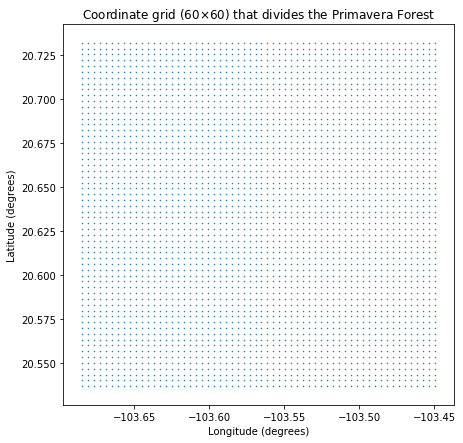

In [154]:
# Determine geospacial delimitations for the Primavera Forest 

# Delimitation coordinates
lat1, lon1 = 20.730654, -103.684725
lat2, lon2 = 20.536931, -103.684725
lat3, lon3 = 20.536931, -103.449552
lat4, lon4 = 20.731724, -103.449552
del_lat = [lat1,lat2,lat3,lat4]
del_lon = [lon1,lon2,lon3,lon4]

# Generate a grid for the data points:
lat_numbers = 60
lon_numbers = 60
lat_vector = np.linspace(min(del_lat), max(del_lat), lat_numbers)
lon_vector = np.linspace(min(del_lon), max(del_lon), lon_numbers)
lon,lat = np.meshgrid(lon_vector,lat_vector)

# Have all the coordinates in a vector and in a dataframe
coordinates = [[lat,lon] for lat in lat_vector for lon in lon_vector]
coordinates_df = pd.DataFrame(coordinates, columns=['latitude','longitude'])

# Plot the figure
plt.figure(figsize=(7,7))
plt.scatter(lon,lat, s=.3)
plt.title(f'Coordinate grid ({lon_numbers}$\\times${lat_numbers}) that divides the Primavera Forest')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

In [157]:
# Plot the grid on the map
fig = px.scatter_mapbox(coordinates_df, lat='latitude' , lon='longitude', zoom=10.8)
fig.update_layout(mapbox_style="stamen-terrain", margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [131]:
# Read all Historical series of dataframes in Bosque de la Primavera
fire_jal_p = pd.read_csv(f'./Serie_historica/fire_jal_p.csv')

In [156]:
fig = px.scatter_mapbox(fire_jal_p, lat='lat', color='causa' , lon='lon', zoom=9.9, animation_frame='year')
fig.update_layout(mapbox_style="stamen-terrain", margin={"r":1,"t":1,"l":1,"b":1})
fig.show()

In [149]:
# Use a dataset for the heatpoints obtained by a satelite on:
# http://www.marn.gob.sv/mapas-de-puntos-de-calor/

# Dataframe for the information
heat_points = pd.read_csv('./puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65.csv')

# function to replace the latlon column and generate both a latitude and longitude column.
def lat_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[1])

def lon_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[0])

heat_points['lat'] = heat_points.latlon.apply(lat_replace)
heat_points['lon'] = heat_points.latlon.apply(lon_replace)

# Drop non-useful columns
heat_points.drop(['latlon', 'id_pais', 'id_estado','nom_pais', 'nom_estado'], axis=1, inplace=True)



# Filter by the desired coordinates (inside the bosque de la primavera perimeter)
interest_heat_points = heat_points[(heat_points.lon >= min(del_lon))&
                                   (heat_points.lon <= max(del_lon))&
                                   (heat_points.lat >= min(del_lat))&
                                   (heat_points.lat <= max(del_lat))]

def effect(x):
    if (x=='LA PRIMAVERA') or (x =='ANP LA PRIMAVERA'):
        return 'bosque'
    elif (x=='CERCA DE LA PRIMAVERA') or (x =='CERCA DE ANP LA PRIMAVERA'):
        return 'prox_bosque'
    else:
        return 'b'
interest_heat_points.anp = interest_heat_points.anp.apply(effect)

interest_heat_points =interest_heat_points[interest_heat_points.anp != 'b']
def ano(x):
    return x[:4]
def mes(x):
    return int(x[5:7])
def dia(x):
    return int(x[8:10])

interest_heat_points['year'] = interest_heat_points.fecha.apply(ano)
interest_heat_points['month'] = interest_heat_points.fecha.apply(mes)
interest_heat_points['day'] = interest_heat_points.fecha.apply(dia)
interest_heat_points['month_day']=interest_heat_points.month+interest_heat_points.day/30


fig = px.scatter_mapbox(interest_heat_points, lat="lat", lon="lon", color='month_day', zoom=10.8, animation_frame='year')
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [135]:
int_2012 = interest_heat_points[(interest_heat_points.year=='2012')&(interest_heat_points.month_day<=5.5) &(interest_heat_points.month_day>=4.0)]
fig = px.scatter_mapbox(int_2012, lat="lat", lon="lon", color='month_day', zoom=10.8)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [151]:
int_2018 = interest_heat_points[(interest_heat_points.year=='2018')&(interest_heat_points.month_day<=4.5) &(interest_heat_points.month_day>=4.0)]
fig = px.scatter_mapbox(int_2018, lat="lat", lon="lon", color='month_day', zoom=10.8)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()